# Final Project - Time Series Analysis Model
## Mishandled Bag Ratio - US Airlines Industry


In [71]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab as pl
from sklearn import cross_validation
from sklearn import linear_model, metrics
import numpy as np
%matplotlib inline

In [72]:
#Read in data from source 
df= pd.read_csv("C:/Users/fcama/Desktop/MBR_DS_Proj/V3_HUB1_Bag_Perf.csv")
df.head()

,Year,Month,DOM,DOW,DOW2,Date,Numb_Passengers,Numb_Bags,MTD_Bags,Bag_Pass_Ratio,...,%(+/-),A0,D0,num_gate_chg,flight_div,flights_cancelled,cnl_mech,cnl_we,cnl_other,Misc_Reason
0,2016,Jan,1,F,5-F,1/1/2016,73717,58781,58781,0.797387,...,-24%,69.3,55.4,76,1,5,1,0,4,0
1,2016,Jan,2,J,6-J,1/2/2016,74144,67703,126484,0.913129,...,-17%,71.5,61.3,50,1,12,2,10,0,0
2,2016,Jan,3,S,7-S,1/3/2016,84940,72571,199055,0.854380,...,-12%,73.5,59.9,62,0,4,1,2,1,AM ABR TSA
3,2016,Jan,4,M,1-M,1/4/2016,79386,73744,272799,0.928930,...,-19%,75.9,63.7,58,0,8,8,0,0,0
4,2016,Jan,5,T,2-T,1/5/2016,71323,62199,334998,0.872075,...,-15%,74.0,68.0,31,0,2,0,2,0,0


In [73]:
df.shape

(673, 28)

In [74]:
df.describe()

,Year,DOM,Numb_Passengers,Numb_Bags,MTD_Bags,Bag_Pass_Ratio,MTD_Bags.1,MBR_Day_Of,Count_Day_of,MBR_Goal,MBR,Met_Goal,A0,D0,flight_div,flights_cancelled,cnl_mech,cnl_we,cnl_other
count,673.000000,673.000000,673.000000,673.000000,6.730000e+02,673.000000,6.730000e+02,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,2016.456166,15.676077,76941.236256,58329.955423,9.148426e+05,0.759772,1.205686e+06,7.209896,551.263001,7.572422,8.285438,0.539376,66.772660,64.622734,1.772660,9.524517,1.964339,6.511144,1.035661
std,0.498445,8.838278,8039.360514,6415.347027,5.213394e+05,0.056091,6.882950e+05,3.882920,279.293119,1.630101,4.957797,0.498818,14.329104,13.446164,6.212772,23.619058,3.335671,20.726398,4.193452
min,2016.000000,1.000000,43274.000000,30939.000000,4.955800e+04,0.608756,6.378800e+04,2.800000,160.000000,4.200000,3.370000,0.000000,13.200000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,8.000000,71660.000000,54073.000000,4.598400e+05,0.725516,6.032040e+05,4.910000,385.000000,6.550000,5.520000,0.000000,61.200000,58.800000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2016.000000,16.000000,77906.000000,58455.000000,9.079800e+05,0.745537,1.209296e+06,6.280000,479.000000,7.400000,7.000000,1.000000,70.400000,68.100000,0.000000,3.000000,1.000000,0.000000,0.000000
75%,2017.000000,23.000000,82795.000000,62663.000000,1.358032e+06,0.784226,1.791277e+06,8.240000,641.000000,8.900000,9.360000,1.000000,77.000000,74.000000,1.000000,8.000000,3.000000,3.000000,1.000000
max,2017.000000,31.000000,98333.000000,77146.000000,2.001835e+06,1.009308,2.595067e+06,46.390000,2800.000000,10.400000,56.880000,1.000000,88.300000,86.500000,55.000000,241.000000,56.000000,214.000000,73.000000


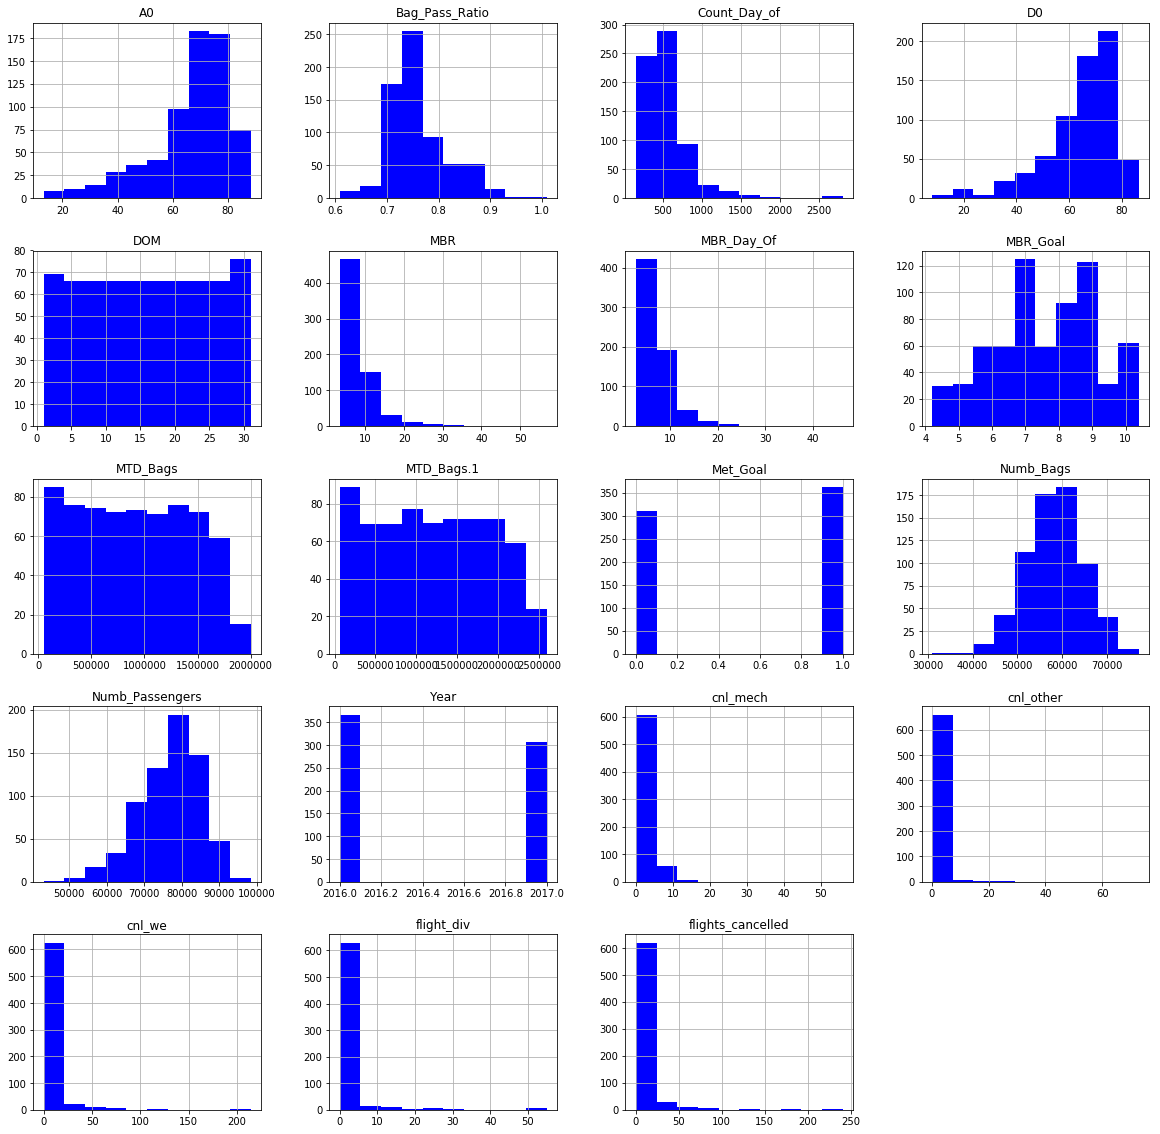

In [77]:
df.hist(color='blue', figsize=(20,20))
pl.show()

In [78]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

KeyError: 'Date'

In [69]:
df['Date', 'A_0', 'Bag_Pass_Ratio'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

KeyError: 'Date'

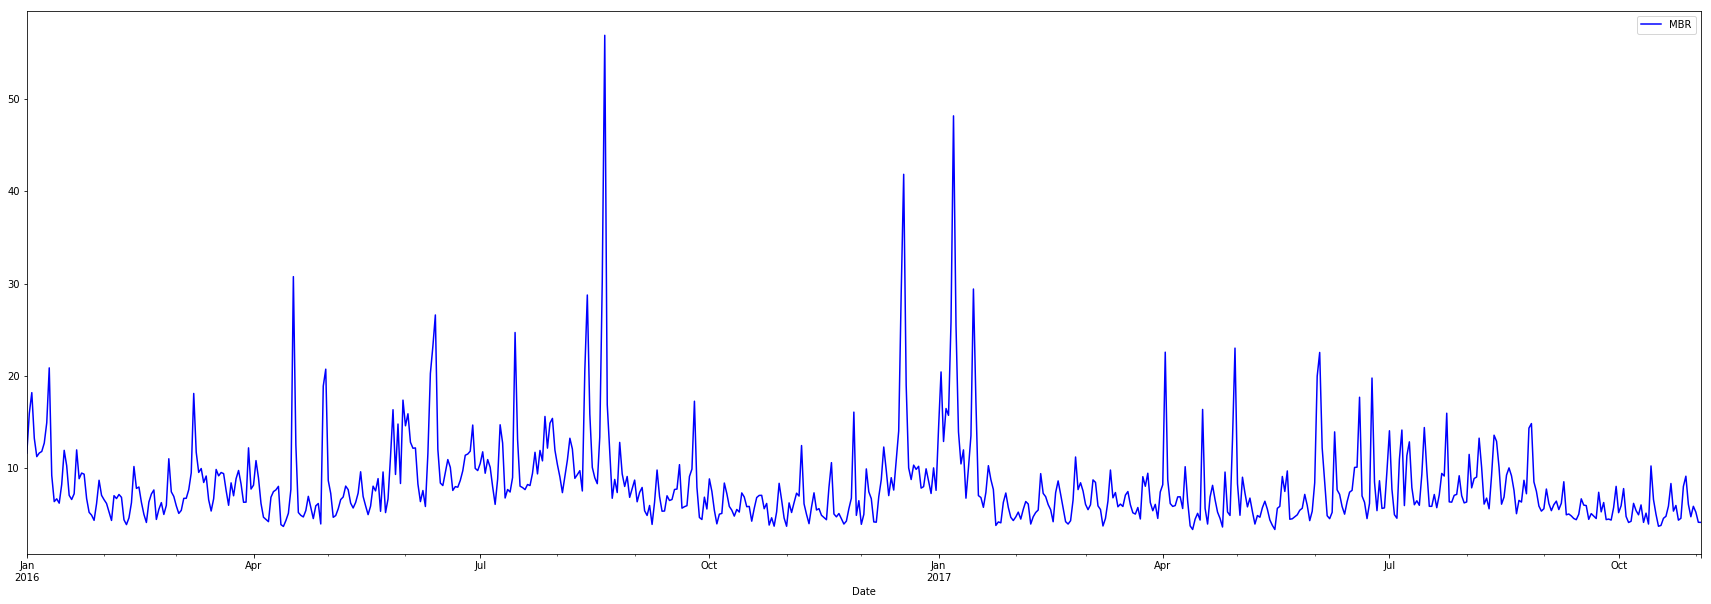

In [9]:
# Plot MBR over time
df[['MBR']].plot(color='blue', figsize=(30,10))

In [27]:
df.corr()

,Year,DOM,Numb_Passengers,Numb_Bags,MTD_Bags,Bag_Pass_Ratio,MTD_Bags.1,MBR_Day_Of,Count_Day_of,MBR_Goal,MBR,Met_Goal,A0,D0,flight_div,flights_cancelled,cnl_mech,cnl_we,cnl_other
Year,1.000000,-0.009984,0.116179,0.157801,0.026290,0.074124,0.008825,-0.111354,-0.100125,0.071439,-0.123284,0.235882,-0.016378,0.067658,-0.048634,-0.027306,-0.153094,-0.013673,0.031362
DOM,-0.009984,1.000000,0.009865,0.007770,0.994318,0.001512,0.994828,-0.034988,-0.037774,0.017254,-0.031710,0.071080,0.015091,0.052057,0.012858,-0.001680,0.005513,0.001701,-0.019843
Numb_Passengers,0.116179,0.009865,1.000000,0.785467,0.048134,-0.283856,0.058703,-0.111643,0.108593,0.015523,-0.142248,0.052870,-0.134577,-0.203379,-0.204384,-0.205744,0.165452,-0.238518,-0.116605
Numb_Bags,0.157801,0.007770,0.785467,1.000000,0.056659,0.365885,0.050361,0.185987,0.368152,0.202220,0.132866,-0.127352,-0.166620,-0.291286,-0.179682,-0.153878,0.195717,-0.193198,-0.069011
MTD_Bags,0.026290,0.994318,0.048134,0.056659,1.000000,0.019350,0.997699,-0.014653,-0.008650,0.062014,-0.013415,0.070827,-0.011614,0.020844,0.019564,0.002669,0.025208,0.003340,-0.019316
Bag_Pass_Ratio,0.074124,0.001512,-0.283856,0.365885,0.019350,1.000000,-0.005489,0.461206,0.405878,0.275061,0.424465,-0.282735,-0.049933,-0.141470,0.031252,0.073394,0.046611,0.063021,0.070343
MTD_Bags.1,0.008825,0.994828,0.058703,0.050361,0.997699,-0.005489,1.000000,-0.026325,-0.018521,0.022672,-0.023713,0.061913,-0.008304,0.023094,0.021049,0.003351,0.031447,0.002892,-0.018447
MBR_Day_Of,-0.111354,-0.034988,-0.111643,0.185987,-0.014653,0.461206,-0.026325,1.000000,0.966404,0.327481,0.980567,-0.509346,-0.636404,-0.714034,0.421790,0.506482,0.269855,0.478963,0.274033
Count_Day_of,-0.100125,-0.037774,0.108593,0.368152,-0.008650,0.405878,-0.018521,0.966404,1.000000,0.347591,0.936176,-0.519762,-0.672921,-0.769336,0.337644,0.426774,0.319407,0.386038,0.242540
MBR_Goal,0.071439,0.017254,0.015523,0.202220,0.062014,0.275061,0.022672,0.327481,0.347591,1.000000,0.322722,0.170347,-0.281523,-0.332217,0.099325,0.110629,0.173821,0.085369,0.064973


C:\Users\fcama\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


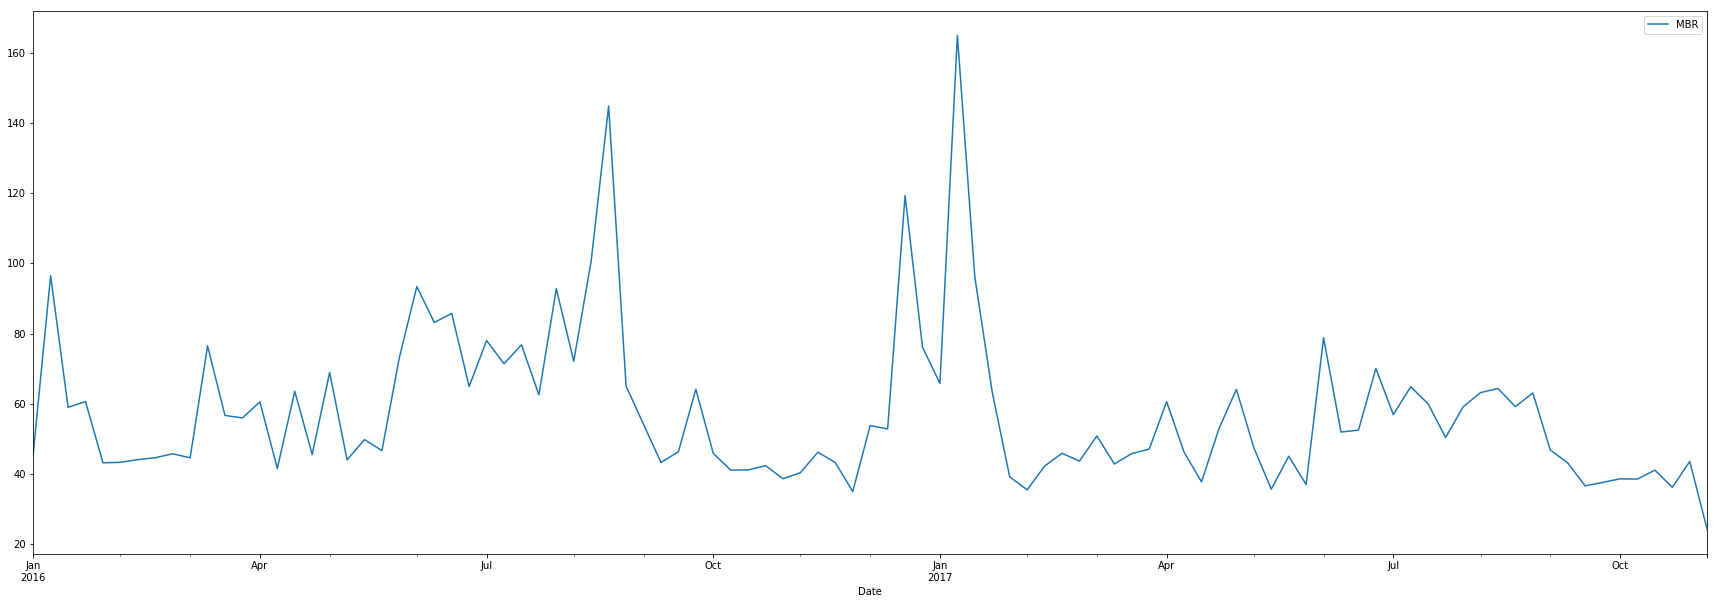

In [10]:
MBR_weekly = df[['MBR']].resample('W', 'sum', )
MBR_weekly.plot(figsize=(30,10))

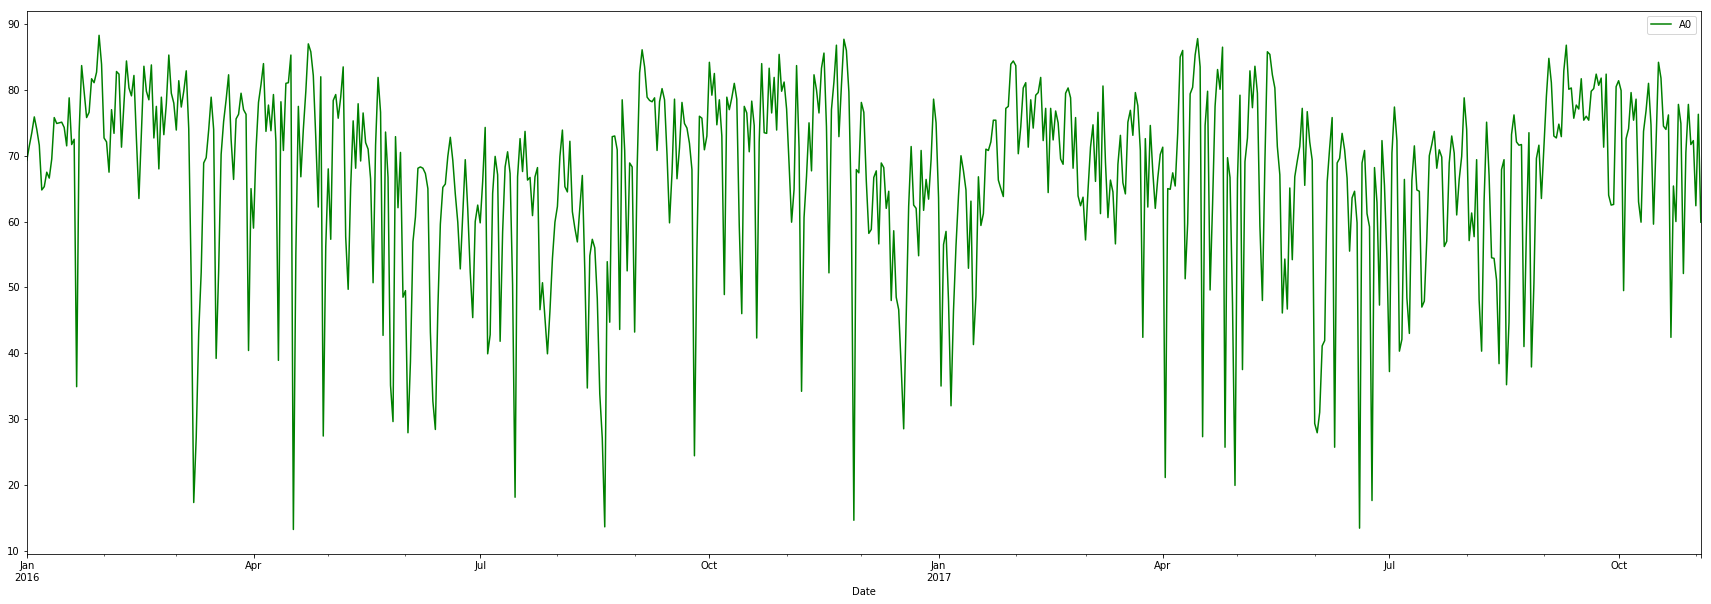

In [11]:
# Plot Arrival on time over time
df[['A0']].plot(color='green', figsize=(30,10))

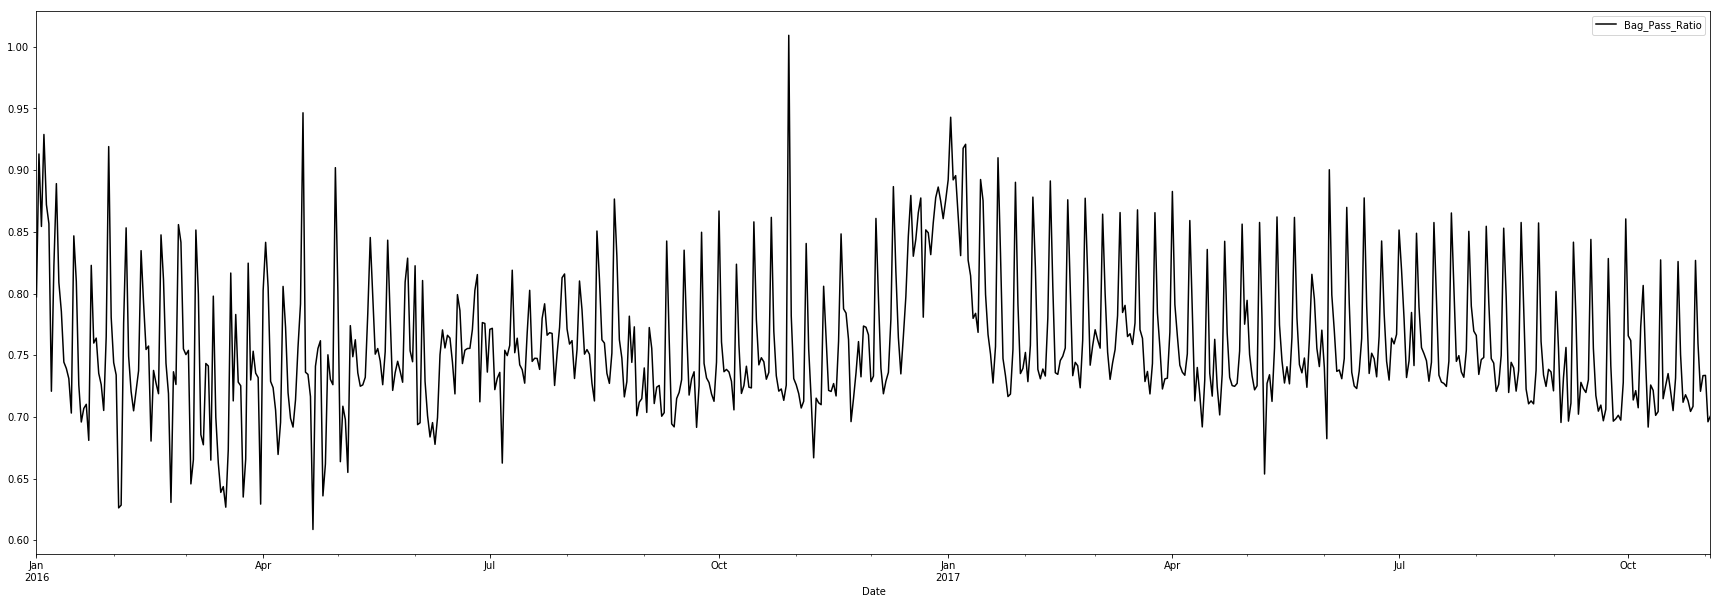

In [12]:
df[['Bag_Pass_Ratio']].plot(color='k', figsize=(30,10))

In [13]:
df.MBR.autocorr(lag=1) # MBR Lag 1 

0.58388251896825505

In [14]:
df.MBR.autocorr(lag=2) # MBR Lag 2 

0.26960160921614457

In [16]:
df.MBR.autocorr(lag=3) # MBR Lag 3

0.13098686957541891

In [17]:
df.MBR.autocorr(lag=7) # MBR Lag 7

0.30503826315540389

## Autocorrection Plots
### We can plot the correlation coefficient for each lag variable.
The plot provides the lag number along the x-axis and the correlation coeeficient value between -1 and 1 on the y-axis.
The plot also includes a solid and dashed lines that indicate the 95% and 99% confidence interval for th ecorrelation values. Correlation values above these lines are more significant than those below the line providing a threshold or cutoff for selecting more relevant lag values.


C:\Users\fcama\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[0, 20, -0.2, 0.65]

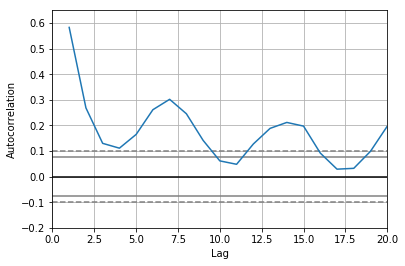

In [64]:
from pandas.tools.plotting import autocorrelation_plot

ax = autocorrelation_plot(df.MBR)
ax.axis([0,20,-.2,.65])

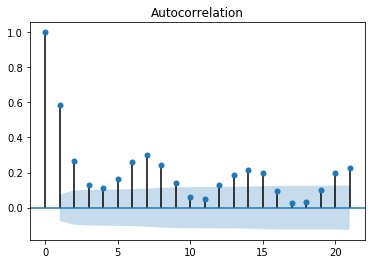

In [70]:
# Look at the plot as vertical line scatter plot.
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(df.MBR, lags=21)
plt.show()

In [63]:
# Build a AR 1 MA 0 model
from statsmodels.tsa.arima_model import ARMA

MBR_data = df.MBR.astype(float)
model = ARMA(df.MBR, (1, 1)).fit()
print model.summary()

                              ARMA Model Results                              
Dep. Variable:                    MBR   No. Observations:                  673
Model:                     ARMA(1, 1)   Log Likelihood               -1887.766
Method:                       css-mle   S.D. of innovations              3.998
Date:                Thu, 30 Nov 2017   AIC                           3783.532
Time:                        11:33:36   BIC                           3801.579
Sample:                    01-01-2016   HQIC                          3790.521
                         - 11-03-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2832      0.340     24.387      0.000       7.618       8.949
ar.L1.MBR      0.4635      0.056      8.209      0.000       0.353       0.574
ma.L1.MBR      0.1843      0.062      2.964      0.0

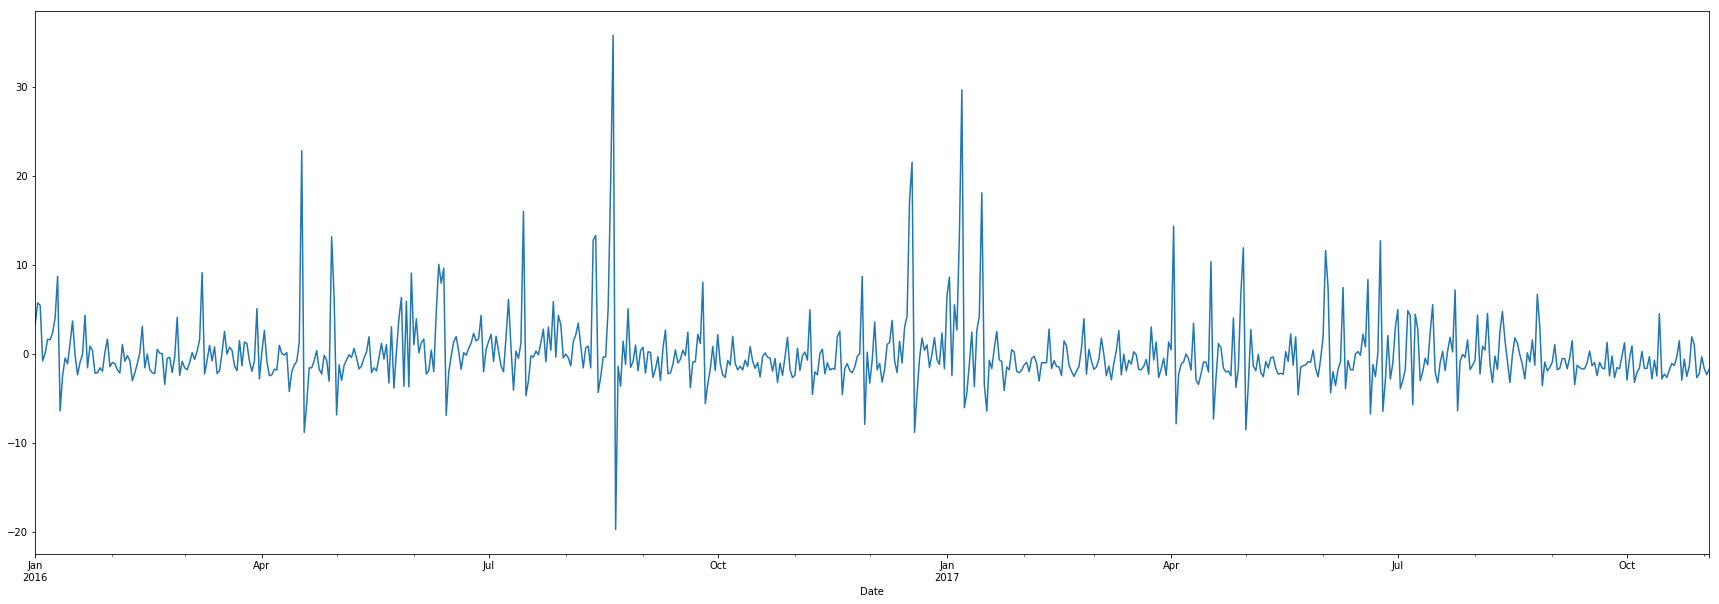

In [43]:
model.resid.plot(figsize=(30,10))

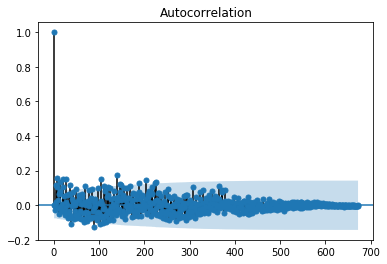

In [66]:
plot_acf(model.resid)
plt.show()

In [61]:
model_arma = ARMA(df.MBR, (2, 5)).fit()
print model.summary()

                              ARMA Model Results                              
Dep. Variable:                    MBR   No. Observations:                  673
Model:                     ARMA(2, 7)   Log Likelihood               -1873.065
Method:                       css-mle   S.D. of innovations              3.911
Date:                Thu, 30 Nov 2017   AIC                           3768.130
Time:                        11:30:05   BIC                           3817.759
Sample:                    01-01-2016   HQIC                          3787.350
                         - 11-03-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3123      0.602     13.817      0.000       7.133       9.491
ar.L1.MBR      0.8003      0.349      2.296      0.022       0.117       1.483
ar.L2.MBR      0.1158      0.329      0.352      0.7

In [60]:
from statsmodels.tsa.arima_model import ARIMA
# AR 2 and MA 2 model
model_arima = ARIMA(df.MBR, (2, 0, 7)).fit()
print model.summary()

                              ARMA Model Results                              
Dep. Variable:                    MBR   No. Observations:                  673
Model:                     ARMA(2, 7)   Log Likelihood               -1873.065
Method:                       css-mle   S.D. of innovations              3.911
Date:                Thu, 30 Nov 2017   AIC                           3768.130
Time:                        11:29:45   BIC                           3817.759
Sample:                    01-01-2016   HQIC                          3787.350
                         - 11-03-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3123      0.602     13.817      0.000       7.133       9.491
ar.L1.MBR      0.8003      0.349      2.296      0.022       0.117       1.483
ar.L2.MBR      0.1158      0.329      0.352      0.7

In [47]:
predictions = model.predict(
    "2016-01-01","2017-11-06",
    dynamic=False)

print("Mean absolute error: ", mean_absolute_error(df.MBR["2015-06-02":"2015-03-31"], predictions))

NameError: name 'mean_absolute_error' is not defined

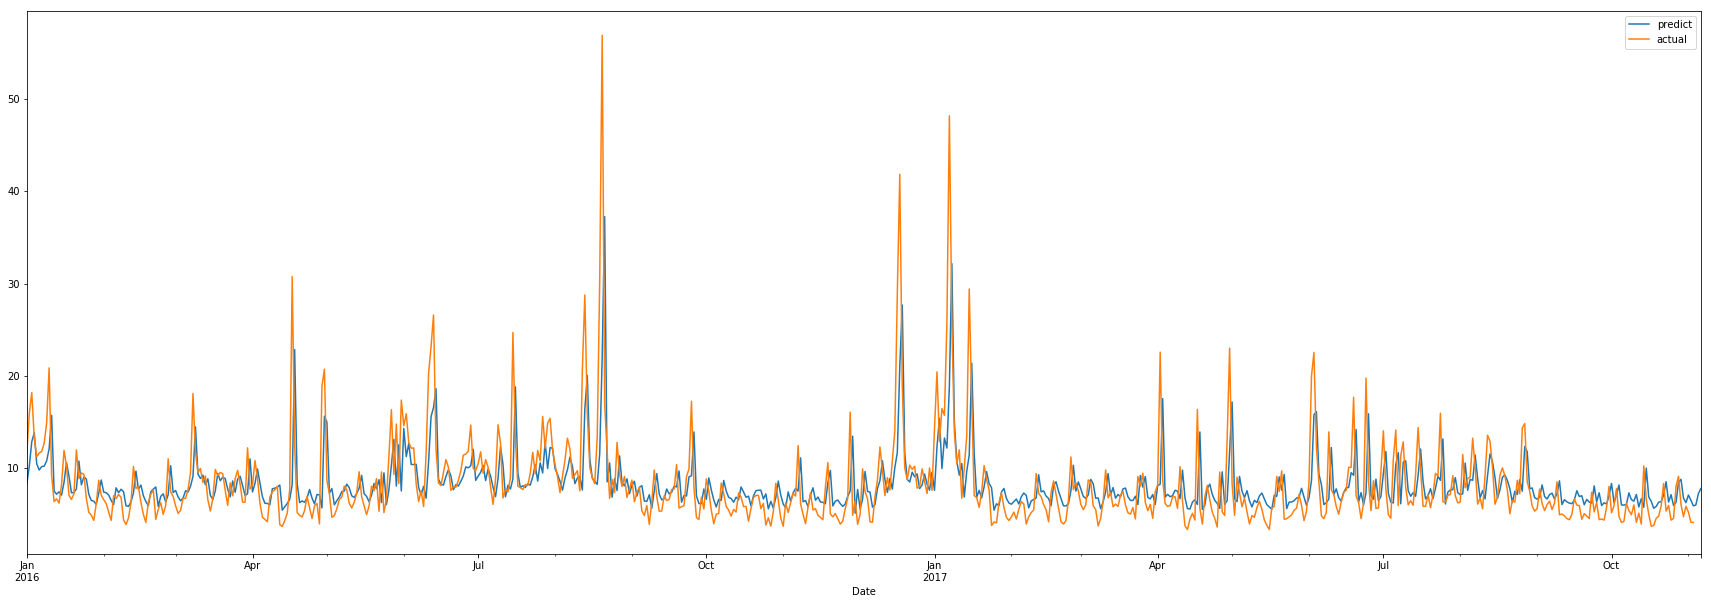

In [48]:
# Visualize the actual and prediction on the same plot
fig, axes = plt.subplots()
model.predict("2016-01-01","2017-11-06").plot(ax = axes, figsize=(30,10))
df.MBR["2016-01-01":"2017-11-06"].plot(ax = axes, figsize=(30,10))
plt.legend(["predict","actual"])

In [49]:
# Another way of plotting actual and prediction though its unclear why this is different than before
model.plot_predict("2016-01-01","2017-11-06", figsize=(30,10))

TypeError: plot_predict() got an unexpected keyword argument 'figsize'

In [50]:
# Another useful statistic is the Durbin Watson statistic to see if you have captured all the autocorrelation
# information in the model. If its close to 2, then the model has no autocorrelation
import statsmodels.api as sm
sm.stats.durbin_watson(model.resid.values)

1.9951619310917763